In [55]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import xarray as xr
from sizedist_utils import compute_Nx_ebas_cleaned
import matplotlib.pyplot as plt

In [57]:
pwd

'/home/jovyan/Tjaernoe2022-group1_2nd/notebooks/Ingvild'

## Loading data

In [78]:
data1 = xr.open_dataset('/home/jovyan/Data/zeppelin-cloud-aerosol-1_part1.nc4')
data2 = xr.open_dataset('/home/jovyan/Data/zeppelin-cloud-aerosol-1_part2.nc4')

In [81]:
data1

<xarray.Dataset>
Dimensions:                                        (time: 83755,
                                                    aerosol_diameters: 30,
                                                    cloud_diameters: 43,
                                                    boundaries: 2,
                                                    target_classification: 11)
Coordinates:
  * time                                           (time) datetime64[ns] 2015...
  * aerosol_diameters                              (aerosol_diameters) float64 ...
  * cloud_diameters                                (cloud_diameters) float64 ...
  * boundaries                                     (boundaries) object 'left'...
  * target_classification                          (target_classification) object ...
Data variables: (12/17)
    aerosol_particle_size_distribution             (time, aerosol_diameters) float64 ...
    total_aerosol_particle_concentration           (time) float64 29.39 ... 2...
    cloud_flag                                     (time) object 'yes' ... 'no'
    enrichment_factor                              (time) float64 10.82 ... 1.0
    transmission_efficiency_factor                 (time) float64 2.796 ... nan
    cluster                                        (time) float64 2.0 ... nan
    ...                                             ...
    temperature                                    (time) float64 -6.659 ... ...
    wind_direction                                 (time) float64 130.2 ... 1...
    wind_speed                                     (time) float64 9.748 ... 1...
    updraft_velocity                               (time) float64 4.506 ... 4...
    time_bounds                                    (time, boundaries) datetime64[ns] ...
    normalised_target_classification               (time, target_classification) float64 ...
Attributes:
    title:       Cloud and aerosol measurements from Zeppelin Observatory, Sv...
    authors:     Linn Karlsson, Paul Zieger, Radovan Krejci, Makoto Koike, Ke...
    contact:     Paul Zieger, paul.zieger@aces.su.se
    site:        Zeppelin Observatory, Svalbard, 78.9N 11.9E
    comment:     This is one of two files that together contain all data that...
    start_date:  2015-11-27
    end_date:    2018-02-04
    version:     1.0
    history:     2021-05-06 created

In [49]:
data2.aerosol_particle_size_distribution

<xarray.DataArray 'aerosol_particle_size_distribution' (time: 31061,
                                                        aerosol_diameters: 57)>
[1770477 values with dtype=float64]
Coordinates:
  * time               (time) datetime64[ns] 2015-11-27T08:29:05 ... 2018-02-...
  * aerosol_diameters  (aerosol_diameters) float64 5e-09 6e-09 ... 9.55e-07
Attributes:
    long_name:   Aerosol particle number size distribution (dN/dlogD)
    instrument:  Differential mobility particle sizer (DMPS)
    units:       cm-3
    history:     Corrected for diffusion, impaction and sedimentation losses
    comment:     The size distribution is a combination of measurements from ...

## Masking data with cloud mask

In [60]:
data1_cl_mask=data1.where(data1['cloud_flag']=='yes')

In [61]:
data1_cl_mask

<xarray.Dataset>
Dimensions:                                        (time: 83755,
                                                    aerosol_diameters: 30,
                                                    cloud_diameters: 43,
                                                    boundaries: 2,
                                                    target_classification: 11)
Coordinates:
  * time                                           (time) datetime64[ns] 2015...
  * aerosol_diameters                              (aerosol_diameters) float64 ...
  * cloud_diameters                                (cloud_diameters) float64 ...
  * boundaries                                     (boundaries) object 'left'...
  * target_classification                          (target_classification) object ...
Data variables: (12/17)
    aerosol_particle_size_distribution             (time, aerosol_diameters) float64 ...
    total_aerosol_particle_concentration           (time) float64 29.39 ... nan
    cloud_flag                                     (time) object 'yes' ... nan
    enrichment_factor                              (time) float64 10.82 ... nan
    transmission_efficiency_factor                 (time) float64 2.796 ... nan
    cluster                                        (time) float64 2.0 ... nan
    ...                                             ...
    temperature                                    (time) float64 -6.659 ... nan
    wind_direction                                 (time) float64 130.2 ... nan
    wind_speed                                     (time) float64 9.748 ... nan
    updraft_velocity                               (time) float64 4.506 ... nan
    time_bounds                                    (time, boundaries) datetime64[ns] ...
    normalised_target_classification               (time, target_classification) float64 ...
Attributes:
    title:       Cloud and aerosol measurements from Zeppelin Observatory, Sv...
    authors:     Linn Karlsson, Paul Zieger, Radovan Krejci, Makoto Koike, Ke...
    contact:     Paul Zieger, paul.zieger@aces.su.se
    site:        Zeppelin Observatory, Svalbard, 78.9N 11.9E
    comment:     This is one of two files that together contain all data that...
    start_date:  2015-11-27
    end_date:    2018-02-04
    version:     1.0
    history:     2021-05-06 created

In [62]:
Nx_cloud =compute_Nx_ebas_cleaned(data1_cl_mask,x=1e-9, var_diam = 'cloud_diameters', v_dNdlog10D='cloud_particle_size_distribution')

In [103]:
Nx_aero_tot=data1_cl_mask.total_aerosol_particle_concentration/data1_cl_mask.transmission_efficiency_factor

In [77]:
data1_cl_mask['aerosol_particle_size_distribution_eff_fac'] = data1_cl_mask.aerosol_particle_size_distribution/data1_cl_mask.transmission_efficiency_factor

In [98]:
Nx_aero=compute_Nx_ebas_cleaned(data1_cl_mask,x=1e-9, var_diam = 'aerosol_diameters', v_dNdlog10D='aerosol_particle_size_distribution')

In [96]:
Nx_aero=Nx_aero/data1_cl_mask.transmission_efficiency_factor

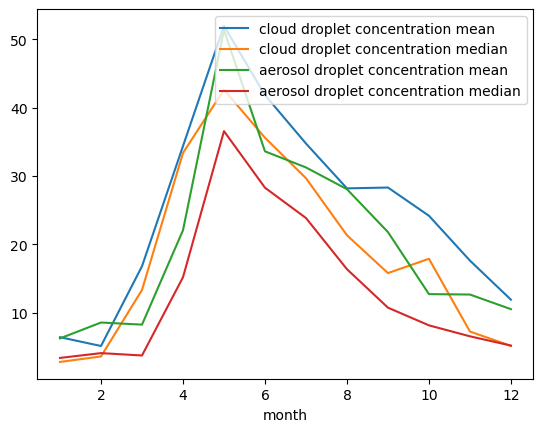

In [105]:
Nx_cloud.groupby('time.month').mean(keep_attrs=True).plot(label='cloud droplet concentration mean')
Nx_cloud.groupby('time.month').median().plot(label='cloud droplet concentration median')
#data1_cl_mask.total_aerosol_particle_concentration.groupby('time.month').mean(keep_attrs=True).plot(label= 'aerosol droplet concentration')
Nx_aero_tot.groupby('time.month').mean(keep_attrs=True).plot(label= 'aerosol droplet concentration mean')
Nx_aero_tot.groupby('time.month').median(keep_attrs=True).plot(label= 'aerosol droplet concentration median')
plt.legend()

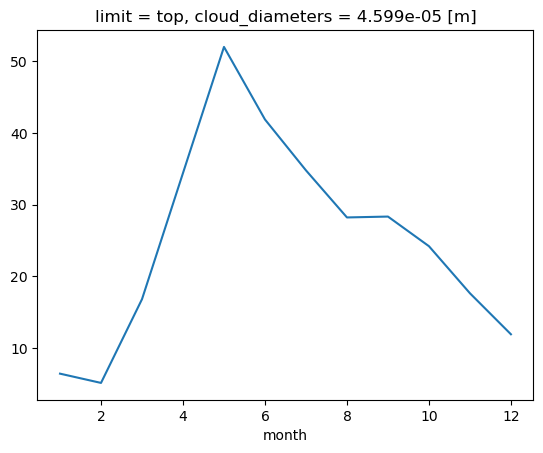

In [42]:
Nx_cloud.groupby('time.month').mean(keep_attrs=True).plot(label='Fog monitor')

## Temperature separation

In [106]:
data1_Tcold_mask=data1.where(data1['temperature'] <= -4.0)

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


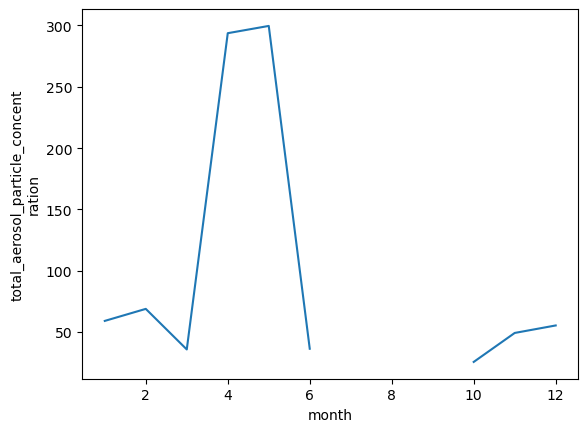

In [107]:
data1_Tcold_mask.total_aerosol_particle_concentration.groupby('time.month').mean().plot()

In [23]:
time='hoho'

di = dict(time='hallo', abc='haha')

In [30]:
di = dict(yscale='log',xscale='log')

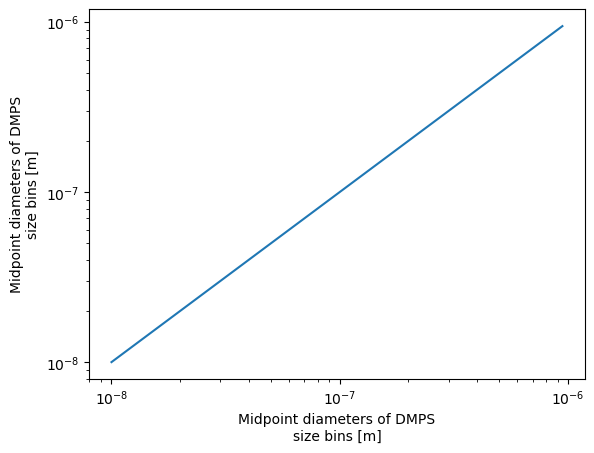

In [31]:
data1['aerosol_diameters'].plot(**di)

In [29]:
time

'hoho'

In [21]:

{abc:'hallo'}

NameError: name 'abc' is not defined

In [15]:
di['time']

'hallo'

In [ ]:
ds.sel({time=dfse)

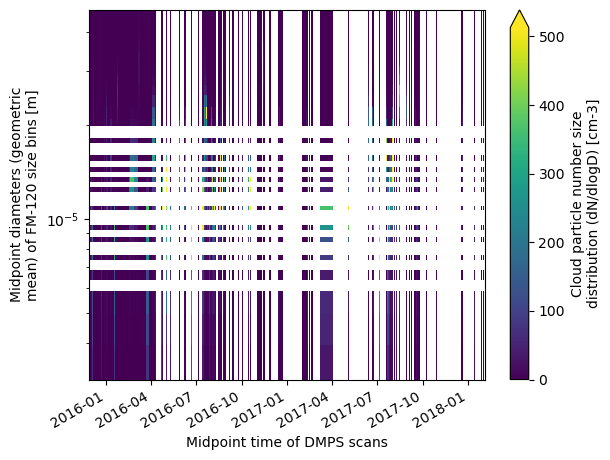

In [35]:
data1['cloud_particle_size_distribution'].plot(x='time', yscale='log', robust=True)

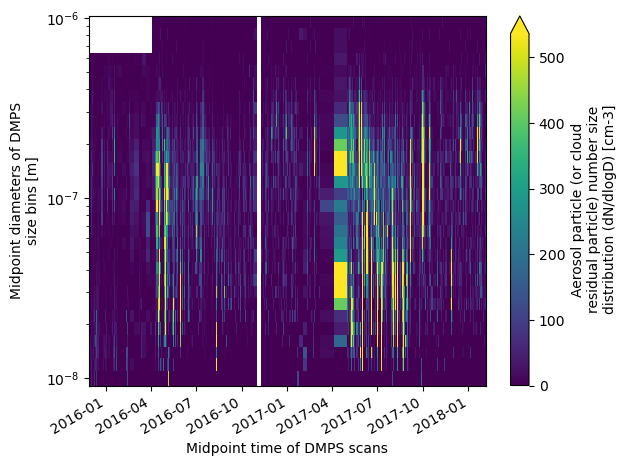

In [19]:
data1['aerosol_particle_size_distribution'].plot(x ='time', robust=True, yscale='log')

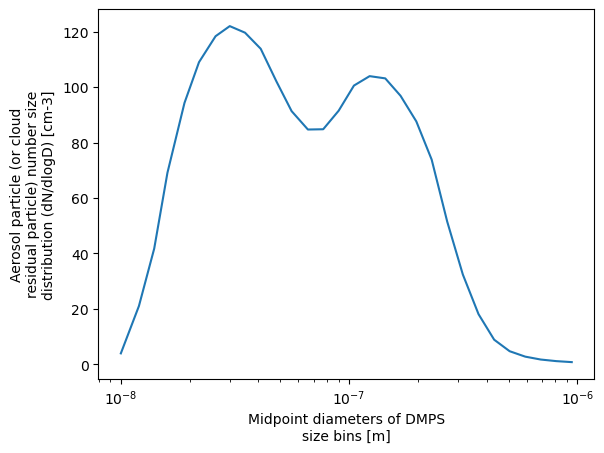

In [23]:
data1['aerosol_particle_size_distribution'].mean('time', keep_attrs=True).plot(xscale='log')#x ='time', robust=True, yscale='log')

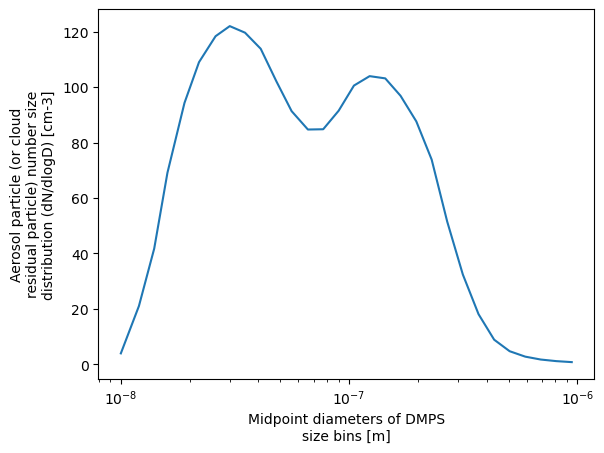

In [23]:
data1['aerosol_particle_size_distribution'].mean('time', keep_attrs=True).plot(xscale='log')